In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Maybank.csv')

In [3]:
# Preprocess and normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Close']])

# Define the look_back window and create input-output pairs
look_back = 30
X, y = [], []
for i in range(len(scaled_data) - look_back):
    X.append(scaled_data[i:i+look_back].flatten())
    y.append(scaled_data[i+look_back][0])

X = np.array(X)
y = np.array(y)

In [4]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [6]:
from tensorflow.keras.layers import Activation

model = Sequential([
    Dense(units=64, activation='relu', input_dim=look_back),
    Dense(units=32, activation='relu'),
    Dense(units=32, activation='sigmoid'),
    Dense(units=1, activation='linear')  # No activation function for regression
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=1000, validation_split=0.1)

Epoch 1/1000
55/55 [==============================] - 1s 4ms/step - loss: 0.0326 - val_loss: nan
Epoch 2/1000
55/55 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: nan
Epoch 3/1000
55/55 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: nan
Epoch 4/1000
55/55 [==============================] - 0s 2ms/step - loss: 8.6452e-04 - val_loss: nan
Epoch 5/1000
55/55 [==============================] - 0s 2ms/step - loss: 8.6612e-04 - val_loss: nan
Epoch 6/1000
55/55 [==============================] - 0s 2ms/step - loss: 7.5353e-04 - val_loss: nan
Epoch 7/1000
55/55 [==============================] - 0s 2ms/step - loss: 7.2159e-04 - val_loss: nan
Epoch 8/1000
55/55 [==============================] - 0s 2ms/step - loss: 7.0298e-04 - val_loss: nan
Epoch 9/1000
55/55 [==============================] - 0s 2ms/step - loss: 7.8741e-04 - val_loss: nan
Epoch 10/1000
55/55 [==============================] - 0s 2ms/step - loss: 7.6916e-04 - val_loss: nan
E

16/16 [==============================] - 0s 984us/step
Mean Squared Error: 0.0075


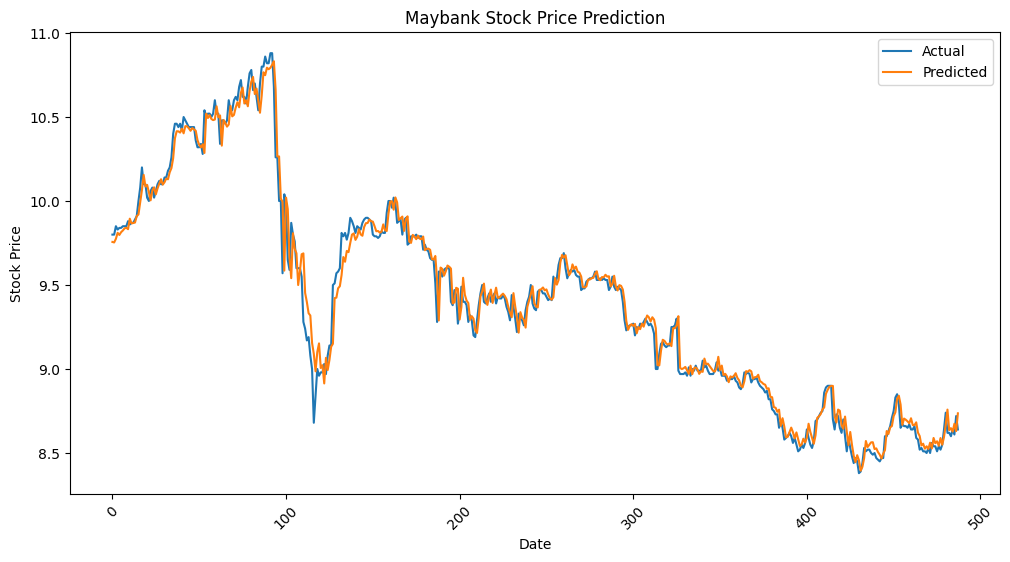

In [7]:
# Make predictions
predictions = model.predict(x_test)

# Inverse transform the predictions and actual values to their original scales
predictions = scaler.inverse_transform(predictions)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_original, predictions)
print(f"Mean Squared Error: {mse:.4f}")

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Maybank Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()# Visualize the results with correctly formatted dates

In [8]:
# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=2000, validation_split=0.1)

Epoch 1/2000
55/55 [==============================] - 0s 2ms/step - loss: 3.8952e-04 - val_loss: nan
Epoch 2/2000
55/55 [==============================] - 0s 2ms/step - loss: 3.7418e-04 - val_loss: nan
Epoch 3/2000
55/55 [==============================] - 0s 2ms/step - loss: 3.9419e-04 - val_loss: nan
Epoch 4/2000
55/55 [==============================] - 0s 2ms/step - loss: 3.4234e-04 - val_loss: nan
Epoch 5/2000
55/55 [==============================] - 0s 2ms/step - loss: 4.2826e-04 - val_loss: nan
Epoch 6/2000
55/55 [==============================] - 0s 2ms/step - loss: 3.3144e-04 - val_loss: nan
Epoch 7/2000
55/55 [==============================] - 0s 2ms/step - loss: 3.1447e-04 - val_loss: nan
Epoch 8/2000
55/55 [==============================] - 0s 2ms/step - loss: 3.8476e-04 - val_loss: nan
Epoch 9/2000
55/55 [==============================] - 0s 2ms/step - loss: 3.3119e-04 - val_loss: nan
Epoch 10/2000
55/55 [==============================] - 0s 2ms/step - loss: 3.6167e-04 - val

16/16 [==============================] - 0s 934us/step
Mean Squared Error: 0.0109


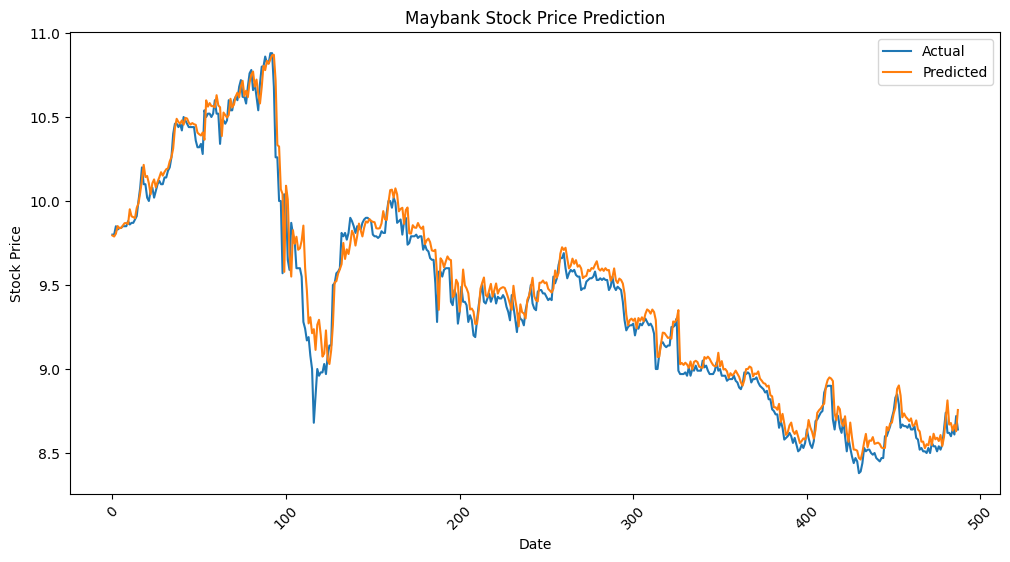

In [9]:
# Make predictions
predictions = model.predict(x_test)

# Inverse transform the predictions and actual values to their original scales
predictions = scaler.inverse_transform(predictions)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_original, predictions)
print(f"Mean Squared Error: {mse:.4f}")

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Maybank Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()# Visualize the results with correctly formatted dates

In [10]:
# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=3000, validation_split=0.1)

Epoch 1/3000
55/55 [==============================] - 0s 3ms/step - loss: 2.6980e-04 - val_loss: nan
Epoch 2/3000
55/55 [==============================] - 0s 2ms/step - loss: 2.6740e-04 - val_loss: nan
Epoch 3/3000
55/55 [==============================] - 0s 2ms/step - loss: 2.5652e-04 - val_loss: nan
Epoch 4/3000
55/55 [==============================] - 0s 2ms/step - loss: 2.5543e-04 - val_loss: nan
Epoch 5/3000
55/55 [==============================] - 0s 2ms/step - loss: 2.8429e-04 - val_loss: nan
Epoch 6/3000
55/55 [==============================] - 0s 2ms/step - loss: 2.6989e-04 - val_loss: nan
Epoch 7/3000
55/55 [==============================] - 0s 2ms/step - loss: 2.8165e-04 - val_loss: nan
Epoch 8/3000
55/55 [==============================] - 0s 2ms/step - loss: 2.5592e-04 - val_loss: nan
Epoch 9/3000
55/55 [==============================] - 0s 2ms/step - loss: 2.8337e-04 - val_loss: nan
Epoch 10/3000
55/55 [==============================] - 0s 2ms/step - loss: 2.8273e-04 - val

16/16 [==============================] - 0s 869us/step
Mean Squared Error: 0.0102


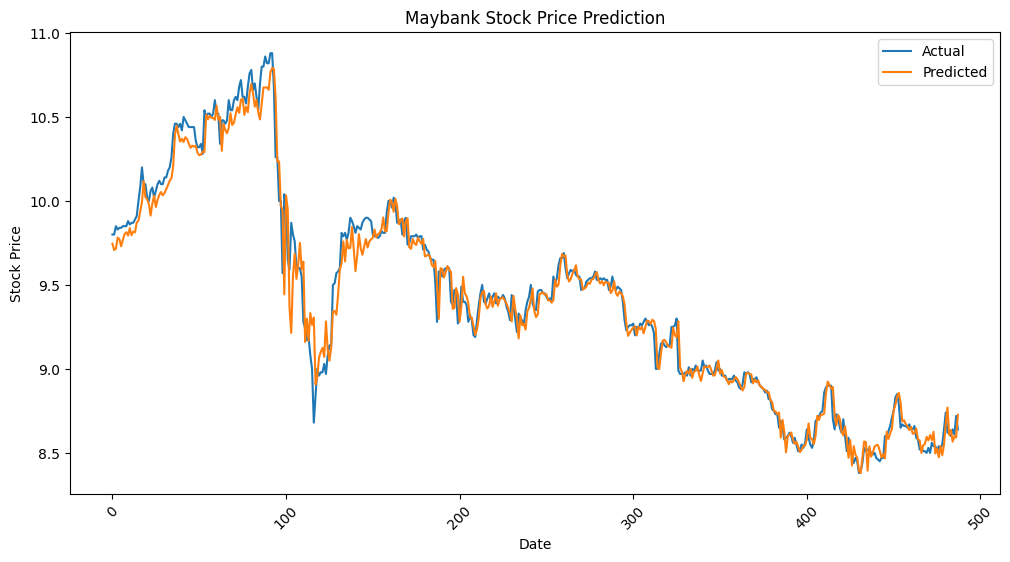

In [11]:
# Make predictions
predictions = model.predict(x_test)

# Inverse transform the predictions and actual values to their original scales
predictions = scaler.inverse_transform(predictions)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_original, predictions)
print(f"Mean Squared Error: {mse:.4f}")

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Maybank Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()# Visualize the results with correctly formatted dates